# Coursework Pt. 1 - Sensing

## Test Data: Open and Closing a window

This document is a test analysis of internal environment data that has been collected from the bme680 sensor

## Import Required Packages

*These need to be checked to ensure they are used in the analysis, otherwise there is no point importing them*

In [52]:
import os 
import warnings
warnings.filterwarnings('ignore')

##General packages
import numpy as np
from numpy.random import normal, seed
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') #plotting style as recommended by Week 5 Tutorial.
%matplotlib inline 
#Plots within notebook
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

## Packages for analyzing time series
import statsmodels.api as sm
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [62]:
df = pd.read_csv('data_log_2.csv')

datetime = df['datetime']
hum = df['humidity']
pres = df['pressure']
temp = df['temperature']

datetime

0      2018/12/05 01:19:15
1      2018/12/05 01:19:16
2      2018/12/05 01:19:17
3      2018/12/05 01:19:18
4      2018/12/05 01:19:19
5      2018/12/05 01:19:20
6      2018/12/05 01:19:21
7      2018/12/05 01:19:22
8      2018/12/05 01:19:23
9      2018/12/05 01:19:24
10     2018/12/05 01:19:25
11     2018/12/05 01:19:26
12     2018/12/05 01:19:27
13     2018/12/05 01:19:29
14     2018/12/05 01:19:30
15     2018/12/05 01:19:31
16     2018/12/05 01:19:32
17     2018/12/05 01:19:33
18     2018/12/05 01:19:34
19     2018/12/05 01:19:35
20     2018/12/05 01:19:36
21     2018/12/05 01:19:37
22     2018/12/05 01:19:38
23     2018/12/05 01:19:39
24     2018/12/05 01:19:40
25     2018/12/05 01:19:41
26     2018/12/05 01:19:42
27     2018/12/05 01:47:50
28     2018/12/05 01:47:51
29     2018/12/05 01:47:52
              ...         
968    2018/12/05 02:04:09
969    2018/12/05 02:04:10
970    2018/12/05 02:04:11
971    2018/12/05 02:04:12
972    2018/12/05 02:04:14
973    2018/12/05 02:04:15
9

## Cleaning the data to remove the units.

Units are retained in the csv as they may be used for context in later processing. I.e app or website development.

In [63]:
for i in range(0,len(df)):
    hum[i] = hum[i][:5]
    pres[i] = pres[i][:8]
    temp[i] = temp[i][:5]

## Plotting Temperature against Time

Showing the result of opening the window at 2am.

The humidity is the most unstable, as it was raining outside and there would have been a considerably larger amount of moisture in the air. \n
The relative humidity is well correlated with the drop in temperature

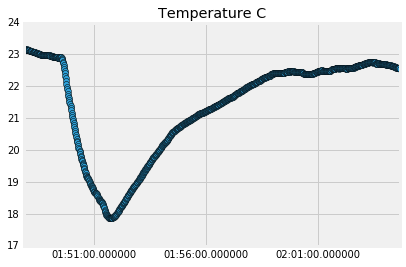

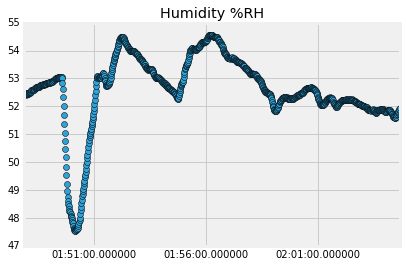

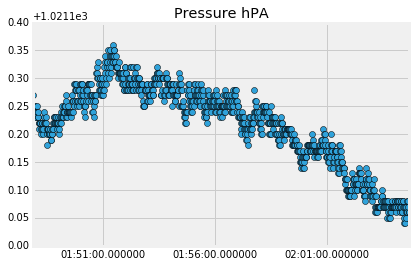

In [66]:
plt.figure(1)
plt.plot_date(datetime[30:998],temp[30:998])
plt.title('Temperature C')
plt.figure(2)
plt.plot_date(datetime[30:998],hum[30:998])
plt.title('Humidity %RH')
plt.figure(3)
plt.plot_date(datetime[30:998],pres[30:998])
plt.title('Pressure hPA')